# **United States Median House Price versus Median Household Income**

### **Import Modules**

In [267]:
# Import Modules
import matplotlib.pyplot as plt     # This is a plotting library for Python that provides an object-oriented API for embedding plots into applications. It is widely used for creating static, animated, and interactive visualizations in Python.
import pandas as pd     # A powerful data manipulation and analysis library that provides data structures like DataFrames and Series. It is essential for data cleaning, transformation, and analysis.
import numpy as np     # A fundamental package for scientific computing in Python. It provides support for arrays, matrices, and a wide range of mathematical functions, which are useful for numerical computations.
import requests     # A library for making HTTP requests in Python. It is often used to retrieve data from APIs or web services.
import time     # A standard library module that provides various time-related functions. It can be useful for measuring execution time or introducing delays in code.
from scipy.stats import linregress     # Part of the SciPy library, this function performs linear regression on two sets of data. It returns the slope, intercept, and other statistics that describe the relationship between the two variables.
from pprint import pprint     # A module that provides a capability to "pretty-print" Python data structures in a formatted way, making them easier to read.
import matplotlib.ticker as ticker     # A module within Matplotlib that provides support for formatting tick marks on plots, allowing for more control over how axis labels are displayed.
import plotly.express as px     # A high-level interface for creating interactive visualizations with Plotly. It simplifies the process of generating complex visualizations with minimal code.
import plotly.graph_objs as go     # This module contains the core objects used to create Plotly visualizations. It provides more granular control over the components of the plots compared to Plotly Express.
from api_keys import api_ninjas_key
import scipy.stats as st

### **API Inclusion**

In [2]:
country = 'United States'
api_url = 'https://api.api-ninjas.com/v1/inflation?country={}'.format(country)
inflation_url = api_url + "appid=" + api_ninjas_key
inflation_url
#response = requests.get(inflation_url)


'https://api.api-ninjas.com/v1/inflation?country=United Statesappid=lCC4svfE9LzM4Pcw56MxWg==7LBMxzxCZa8b8Go4'

In [3]:
# API

url = "https://api.api-ninjas.com/v1/inflationhistorical?"

inflation_api_url = url + "appid=" + api_ninjas_key

inflation_api_url


'https://api.api-ninjas.com/v1/inflationhistorical?appid=lCC4svfE9LzM4Pcw56MxWg==7LBMxzxCZa8b8Go4'

### **Gather and Clean the Data from CSV Files**

In [45]:
##### Read csv files and merge into a single readable dataframe #####

# Data file path for median house price and household income
median_house_price_path = "../Datasets/Median_Sales_Price_Houses_US.csv"
median_household_income_path = "../Datasets/Median_Household_Income_US.csv"
inflation_rate_path = "../Datasets/US_Inflation_Rate_by_Year.csv"

# Read CSV file for median house price data and household income
median_house_price_data = pd.read_csv(median_house_price_path)
median_house_price_data = median_house_price_data.rename(columns = {"DATE":"Year", "MSPUS":"Median House Price"})
median_house_price_data["Year"] = pd.to_datetime(median_house_price_data["Year"])     # Converts to a datetime format
median_house_price_data["Year"] = median_house_price_data["Year"].dt.year     # Extracts and only displays the year for the date
# Group by "Year" and take the maximum "Median House Price" and get the maximum price for each year
median_house_price_data = median_house_price_data.groupby("Year").agg({"Median House Price": "max"}).reset_index()
# reset_index() converts the grouped DataFrame back into a regular DataFrame
#median_house_price_data

median_household_income_data = pd.read_csv(median_household_income_path)
median_household_income_data = median_household_income_data.rename(columns = {"DATE":"Year", "MEHOINUSA672N":"Median Household Income"})
median_household_income_data["Year"] = pd.to_datetime(median_household_income_data["Year"])     # Converts to a datetime format
median_household_income_data["Year"] = median_household_income_data["Year"].dt.year     # Extracts and only displays the year for the date
#median_household_income_data.head()

inflation_rate_data = pd.read_csv(inflation_rate_path)
inflation_rate_data = inflation_rate_data.rename(columns = {"Inflation Rate YOY, From Previous Dec.":"Inflation Rate"})
inflation_rate_data = inflation_rate_data[["Year", "Inflation Rate", "Events Affecting Inflation"]]
#inflation_rate_data.head()

In [177]:
##### Format dataframe to be able to graph values #####

# Combine the data into a single DataFrame
combined_data_df = pd.merge(median_house_price_data, median_household_income_data, how = "inner", on = "Year")
combined_data_df = pd.merge(combined_data_df, inflation_rate_data, how = "inner", on = "Year")

# Convert to integer
combined_data_df["Median House Price"] = combined_data_df["Median House Price"].astype(float)
combined_data_df["Median Household Income"] = combined_data_df["Median Household Income"].astype(float)
combined_data_df["Inflation Rate"] = combined_data_df["Inflation Rate"].str.replace('%', '').astype(float) / 100

# Display the data table for preview
combined_data_df.head()

,Year,Median House Price,Median Household Income,Inflation Rate,Events Affecting Inflation
0,1984,81000.0,58930.0,0.039,NaN
1,1985,86800.0,60050.0,0.038,NaN
2,1986,95000.0,62280.0,0.011,Tax cut
3,1987,111500.0,63060.0,0.044,Black Monday crash
4,1988,115000.0,63530.0,0.044,Fed raised rates


In [130]:
# Show rows with null values in the "Events Affecting Inflation" column
null_events_df = combined_data_df[combined_data_df["Events Affecting Inflation"].isnull()]
#null_events_df

# Show rows without null values in the "Events Affecting Inflation" column
non_null_events_df = combined_data_df[combined_data_df["Events Affecting Inflation"].notnull()]
#non_null_events_df

In [178]:
# Check data types
combined_data_df.dtypes

Year                            int32
Median House Price            float64
Median Household Income       float64
Inflation Rate                float64
Events Affecting Inflation     object
dtype: object

In [216]:
##### Craete new dataframe to format values and write to csv file #####

# Create a copy of the combined_data_df 
combined_data_formatted_df = combined_data_df.copy()

# Convert Median House Price and Median Household Income values to $ format (Note: cannot use this df for graphing because it changes the values from numeric to strings, only will use to export to csv)
combined_data_formatted_df["Median House Price"] = combined_data_formatted_df["Median House Price"].map("${:,.2f}".format)
combined_data_formatted_df["Median Household Income"] = combined_data_formatted_df["Median Household Income"].map("${:,.2f}".format)
combined_data_formatted_df["Inflation Rate"] = combined_data_formatted_df["Inflation Rate"] * 100
combined_data_formatted_df["Inflation Rate"] = combined_data_formatted_df["Inflation Rate"].map("{:.2f}%".format)

# Export the data into a csv
combined_data_formatted_df.to_csv("../Output/House_Price_vs_Household_Income_Data.csv")

# Display the data table for preview
combined_data_formatted_df.head()

,Year,Median House Price,Median Household Income,Inflation Rate,Events Affecting Inflation
0,1984,"$81,000.00","$58,930.00",3.90%,NaN
1,1985,"$86,800.00","$60,050.00",3.80%,NaN
2,1986,"$95,000.00","$62,280.00",1.10%,Tax cut
3,1987,"$111,500.00","$63,060.00",4.40%,Black Monday crash
4,1988,"$115,000.00","$63,530.00",4.40%,Fed raised rates


In [231]:
##### Create a new dataframe to calculate the % change of the Median House Price and Median Household Income year over year to then compare with the inflation rate #####

# Create a copy of the original DataFrame
combined_data_calculations_df = combined_data_df.copy()

# Calculate the Median House Price % Change
combined_data_calculations_df["Median House Price % Change"] = (combined_data_calculations_df["Median House Price"] / combined_data_calculations_df["Median House Price"].shift(1)) - 1

# Calculate the Median Household Income % Change
combined_data_calculations_df["Median Household Income % Change"] = (combined_data_calculations_df["Median Household Income"] / combined_data_calculations_df["Median Household Income"].shift(1)) - 1

# Adjust DataFrame columns
combined_data_calculations_df = combined_data_calculations_df[["Year", "Median House Price", "Median House Price % Change", "Median Household Income", "Median Household Income % Change", "Inflation Rate", "Events Affecting Inflation"]]

# Drop rows where Median House Price % Change or Median Household Income % Change are NaN
combined_data_calculations_df = combined_data_calculations_df.dropna(subset=["Median House Price % Change", "Median Household Income % Change"])

# Display the DataFrame
combined_data_calculations_df.head()

,Year,Median House Price,Median House Price % Change,Median Household Income,Median Household Income % Change,Inflation Rate,Events Affecting Inflation
1,1985,86800.0,0.071605,60050.0,0.019006,0.038,NaN
2,1986,95000.0,0.094470,62280.0,0.037136,0.011,Tax cut
3,1987,111500.0,0.173684,63060.0,0.012524,0.044,Black Monday crash
4,1988,115000.0,0.031390,63530.0,0.007453,0.044,Fed raised rates
5,1989,124800.0,0.085217,64610.0,0.017000,0.046,S&L crisis


In [233]:
##### Create new formatted dataframe to update csv file with new calculated columns #####

# Create a copy of the combined_data_df 
combined_data_calculations_formatted_df = combined_data_calculations_df.copy()

# Convert Median House Price and Median Household Income values to $ format (Note: cannot use this df for graphing because it changes the values from numeric to strings, only will use to export to csv)
combined_data_calculations_formatted_df["Median House Price"] = combined_data_calculations_formatted_df["Median House Price"].map("${:,.2f}".format)
combined_data_calculations_formatted_df["Median Household Income"] = combined_data_calculations_formatted_df["Median Household Income"].map("${:,.2f}".format)
combined_data_calculations_formatted_df["Inflation Rate"] = combined_data_calculations_formatted_df["Inflation Rate"] * 100
combined_data_calculations_formatted_df["Inflation Rate"] = combined_data_calculations_formatted_df["Inflation Rate"].map("{:.2f}%".format)
combined_data_calculations_formatted_df["Median House Price % Change"] = combined_data_calculations_formatted_df["Median House Price % Change"] * 100
combined_data_calculations_formatted_df["Median House Price % Change"] = combined_data_calculations_formatted_df["Median House Price % Change"].map("{:.2f}%".format)
combined_data_calculations_formatted_df["Median Household Income % Change"] = combined_data_calculations_formatted_df["Median Household Income % Change"] * 100
combined_data_calculations_formatted_df["Median Household Income % Change"] = combined_data_calculations_formatted_df["Median Household Income % Change"].map("{:.2f}%".format)

# Export the data into a csv
combined_data_calculations_formatted_df.to_csv("../Output/House_Price_vs_Household_Income_Data.csv")

# Display the data table for preview
combined_data_calculations_formatted_df.head()

,Year,Median House Price,Median House Price % Change,Median Household Income,Median Household Income % Change,Inflation Rate,Events Affecting Inflation
1,1985,"$86,800.00",7.16%,"$60,050.00",1.90%,3.80%,NaN
2,1986,"$95,000.00",9.45%,"$62,280.00",3.71%,1.10%,Tax cut
3,1987,"$111,500.00",17.37%,"$63,060.00",1.25%,4.40%,Black Monday crash
4,1988,"$115,000.00",3.14%,"$63,530.00",0.75%,4.40%,Fed raised rates
5,1989,"$124,800.00",8.52%,"$64,610.00",1.70%,4.60%,S&L crisis


In [202]:
# Check data types
combined_data_calculations_df.dtypes

Year                                  int32
Median House Price                  float64
Median House Price % Change         float64
Median Household Income             float64
Median Household Income % Change    float64
Inflation Rate                      float64
dtype: object

In [204]:
# Create dataframe with Median House Price adjusted for Inflation Rate
#combined_data_df["Median House Price % Increase"] = ((combined_data_df["Median House Price"] / combined_data_df["Median House Price"].shift(1)) - 1) * 100
#combined_data_df["Median House Price % Increase"] = combined_data_df["Median House Price % Increase"].apply(lambda x: f"{x:.2f}%")
#combined_data_df["Median Household Income % Increase"] = ((combined_data_df["Median Household Income"] / combined_data_df["Median Household Income"].shift(1)) - 1) * 100
#combined_data_df["Median Household Income % Increase"] = combined_data_df["Median Household Income % Increase"].apply(lambda x: f"{x:.2f}%")
#combined_data_calculations_df = combined_data_df["

### **Create Scatter Graph for Median House Price vs Median Household Income**

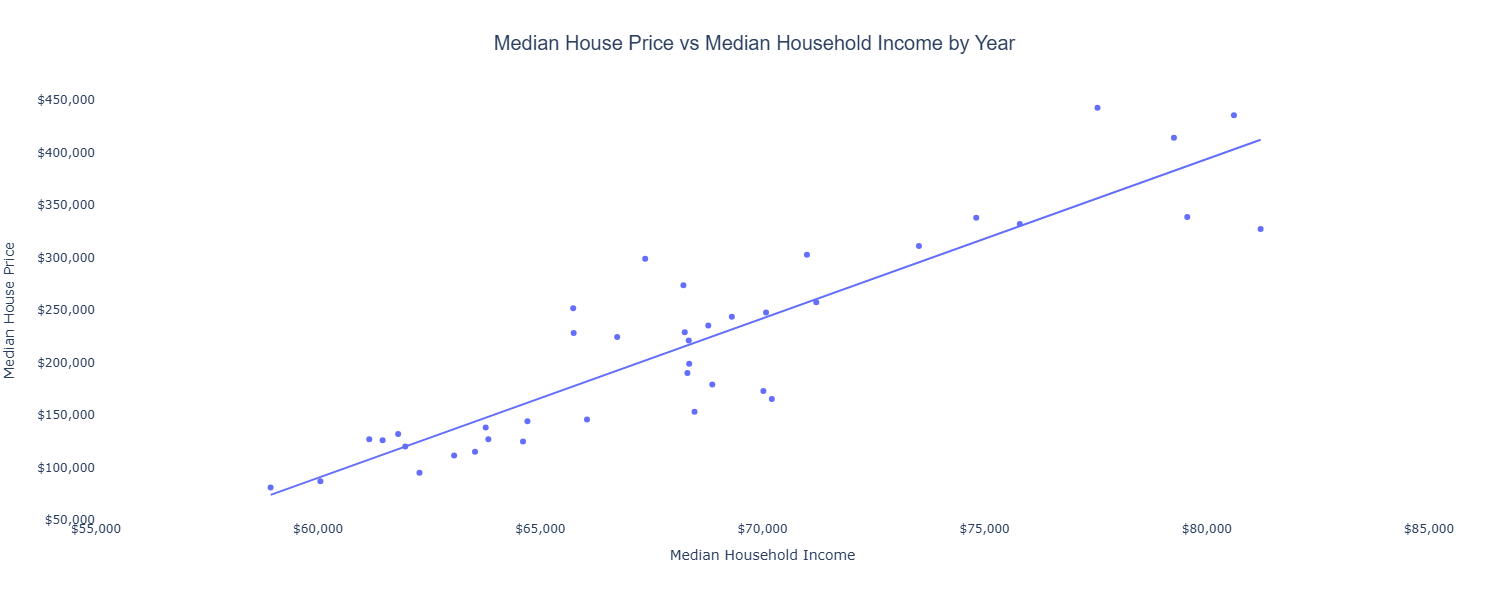

In [205]:
scatter_fig = px.scatter(combined_data_df,
                         x = "Median Household Income", 
                         y = "Median House Price", 
                         hover_name = "Year",     # Display the year when hovering
                         title = "Median House Price vs Median Household Income by Year",
                         width = 800, height = 600,     # Changes to graph's figure size
                         trendline = "ols"  # Add linear regression line (OLS = Ordinary Least Squares regression)
                         )

scatter_fig.update_layout(yaxis_tickformat = "$,.0f",     # Format for y-axis
                          xaxis_tickformat = "$,.0f",     # Format for x-axis
                          plot_bgcolor = "white",     # Set plot area background color
                          title_x = 0.5,    # Center the title
                          title_font = dict(size = 20, family = "Arial, bold")     # Set the title font size and style
                          )

scatter_fig.update_xaxes(range = [55000, 85000], dtick = 5000)     # Set x-axis range and increment
scatter_fig.update_yaxes(range = [50000, 450000], dtick = 50000)     # Set y-axis range and increment

scatter_fig.show()     # Display graph

Graph Analysis: 

can look at the outliers here, but graph doesn't tell us much

### **Create Combo Graph (Bar Chart for Median House Price and Line Chart for Median Household Income)**

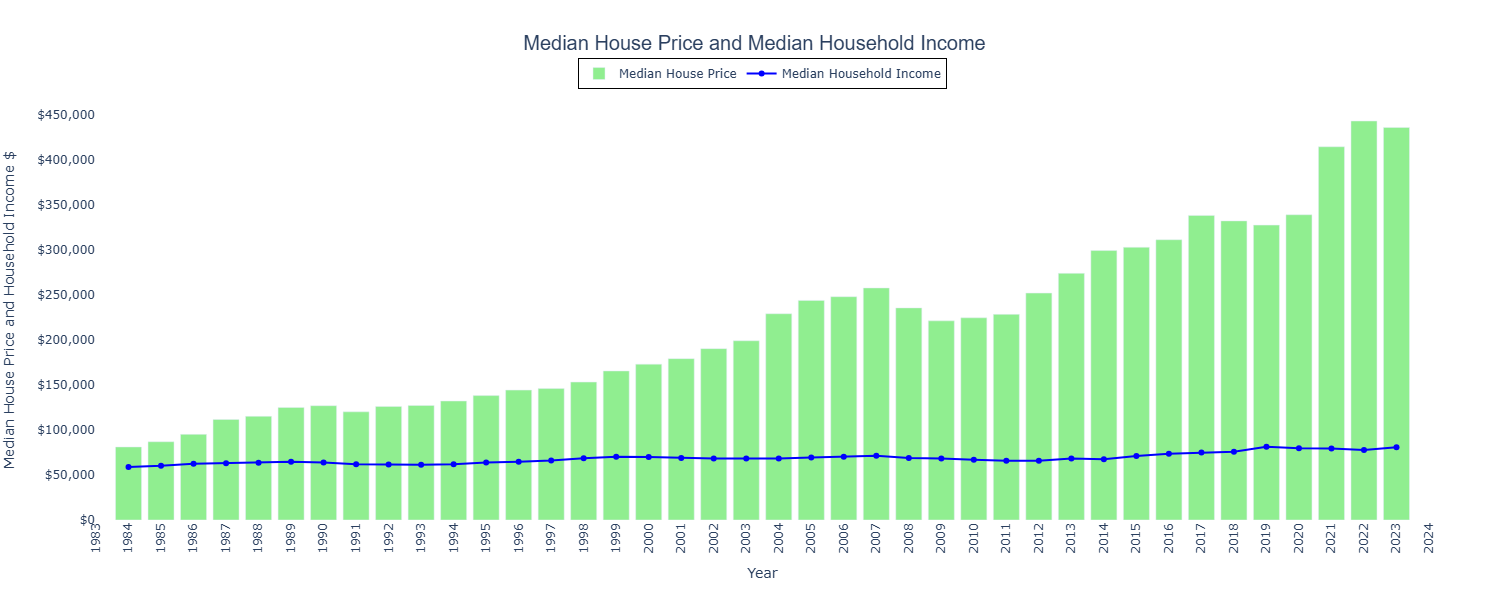

In [206]:
# Create the bar chart for Median House Price
bar_chart = go.Bar(x = combined_data_df["Year"],     # x-axis
                   y = combined_data_df["Median House Price"],     # y-axis
                   name = "Median House Price",     # bar_chart legend title
                   marker = dict(color = "lightgreen")     # Changes the color of the bars
                   )

# Create the line chart for Median Household Income
line_chart = go.Scatter(x = combined_data_df["Year"],     # x-axis
                        y = combined_data_df["Median Household Income"],     # y-axis
                        name = "Median Household Income",     # line_chart legend title
                        mode = "lines+markers",     # Creates a line chart with markers at each data point
                        marker = dict(color = "blue"),     # Changes the color of the line
                        )
        # Notes:
            # In Plotly, the go.Scatter() function is used for both line charts and scatter plots
            # go.Scatter() is a versatile function that can represent data in multiple ways, depending on the parameters you provide

# Create the layout
layout = go.Layout(title = "Median House Price and Median Household Income",
                   xaxis = dict(title = "Year", 
                                tickangle = -90,     # Rotate tick labels to vertical
                                dtick = 1,     # Set the increment for x-axis ticks (1 year)
                                range=[1983, 2024]),     # Set the beginning and end values for the x-axis range
                   plot_bgcolor = "white",     # Set plot area background color
                   title_x = 0.5,    # Center the title
                   title_font = dict(size = 20, family = "Arial, bold"),     # Set the title font size and style
                   width = 1200,
                   height = 600,
                   yaxis = dict(title = "Median House Price and Household Income $", side = "left", tickformat = "$,.0f"),     # Format the y-axis
                   legend = dict(x = 0.5, y = 1.1,     # Position the legend
                                 xanchor = "center",     # Center the legend horizontally
                                 yanchor = "top",     # Anchor the legend to the bottom
                                 orientation = "h",     # Horizontal orientation
                                 bordercolor = "Black",     # Border color of the legend
                                 borderwidth = 1  # Border width of the legend
                                 )
                   )


# Create the figure
combo_fig = go.Figure(data = [bar_chart, line_chart], layout = layout)

# Show the figure
combo_fig.show()

Graph Analysis: 

##### **Second y-axis (not using)**

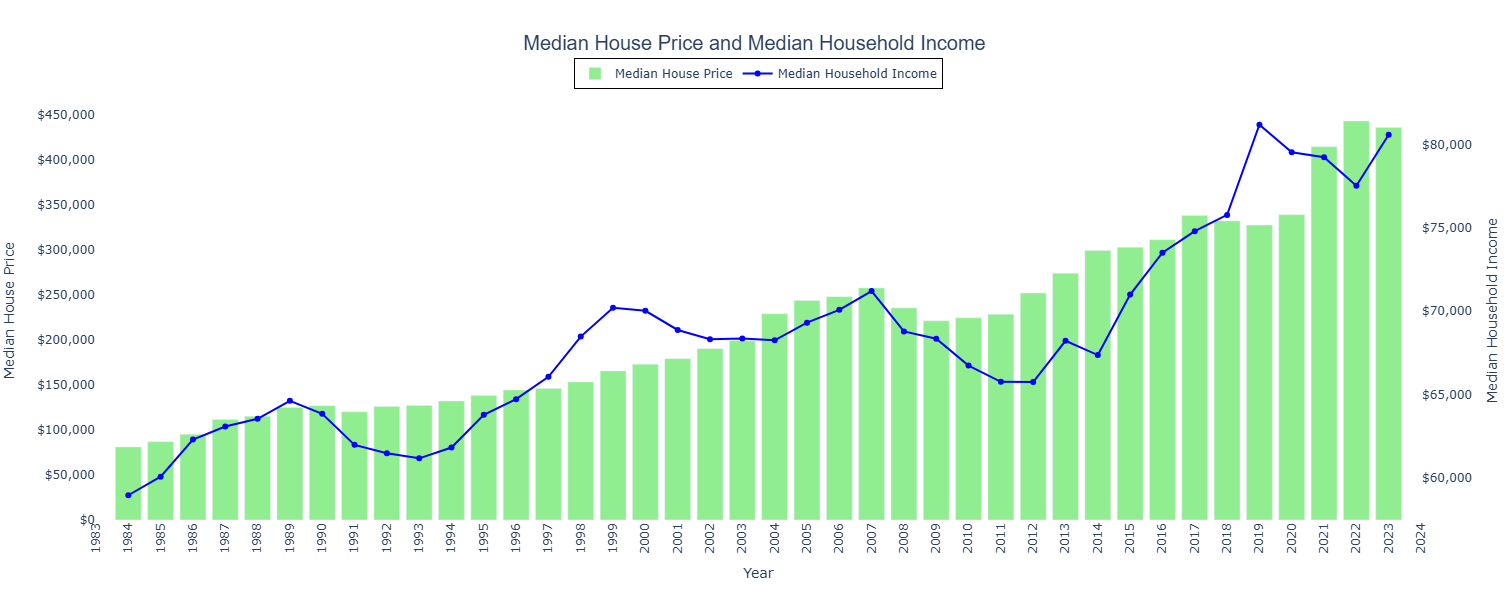

In [207]:
# Create the bar chart for Median House Price
bar_chart = go.Bar(x = combined_data_df["Year"],     # x-axis
                   y = combined_data_df["Median House Price"],     # y-axis
                   name = "Median House Price",     # bar_chart legend title
                   marker = dict(color = "lightgreen")     # Changes the color of the bars
                   )

# Create the line chart for Median Household Income
line_chart = go.Scatter(x = combined_data_df["Year"],     # x-axis
                        y = combined_data_df["Median Household Income"],     # y-axis
                        name = "Median Household Income",     # line_chart legend title
                        mode = "lines+markers",     # Creates a line chart with markers at each data point
                        marker = dict(color = "blue"),     # Changes the color of the line
                        yaxis = "y2"  # Use a secondary y-axis for inflation
                        )
        # Notes:
            # In Plotly, the go.Scatter() function is used for both line charts and scatter plots
            # go.Scatter() is a versatile function that can represent data in multiple ways, depending on the parameters you provide

# Create the layout
layout = go.Layout(title = "Median House Price and Median Household Income",
                   xaxis = dict(title = "Year", 
                                tickangle = -90,     # Rotate tick labels to vertical
                                dtick = 1,     # Set the increment for x-axis ticks (1 year)
                                range=[1983, 2024]),     # Set the beginning and end values for the x-axis range
                   plot_bgcolor = "white",     # Set plot area background color
                   title_x = 0.5,    # Center the title
                   title_font = dict(size = 20, family = "Arial, bold"),     # Set the title font size and style
                   width = 1200,
                   height = 600,
                   yaxis = dict(title = "Median House Price", side = "left", tickformat = "$,.0f"),     # Format the y-axis
                   yaxis_tickformat = "$,.0f",     # Format for y-axis
                   yaxis2 = dict(title = "Median Household Income", overlaying = "y", side = "right", tickformat = "$,.0f"),     # Secondary y-axis for 
                   legend = dict(x = 0.5, y = 1.1,     # Position the legend
                                 xanchor = "center",     # Center the legend horizontally
                                 yanchor = "top",     # Anchor the legend to the bottom
                                 orientation = "h",     # Horizontal orientation
                                 bordercolor = "Black",     # Border color of the legend
                                 borderwidth = 1  # Border width of the legend
                                 )
                   )


# Create the figure
combo_fig = go.Figure(data = [bar_chart, line_chart], layout = layout)

# Show the figure
combo_fig.show()

Graph Analysis:

### **Create the same graph as above, but include a line for the Inflation Rate**

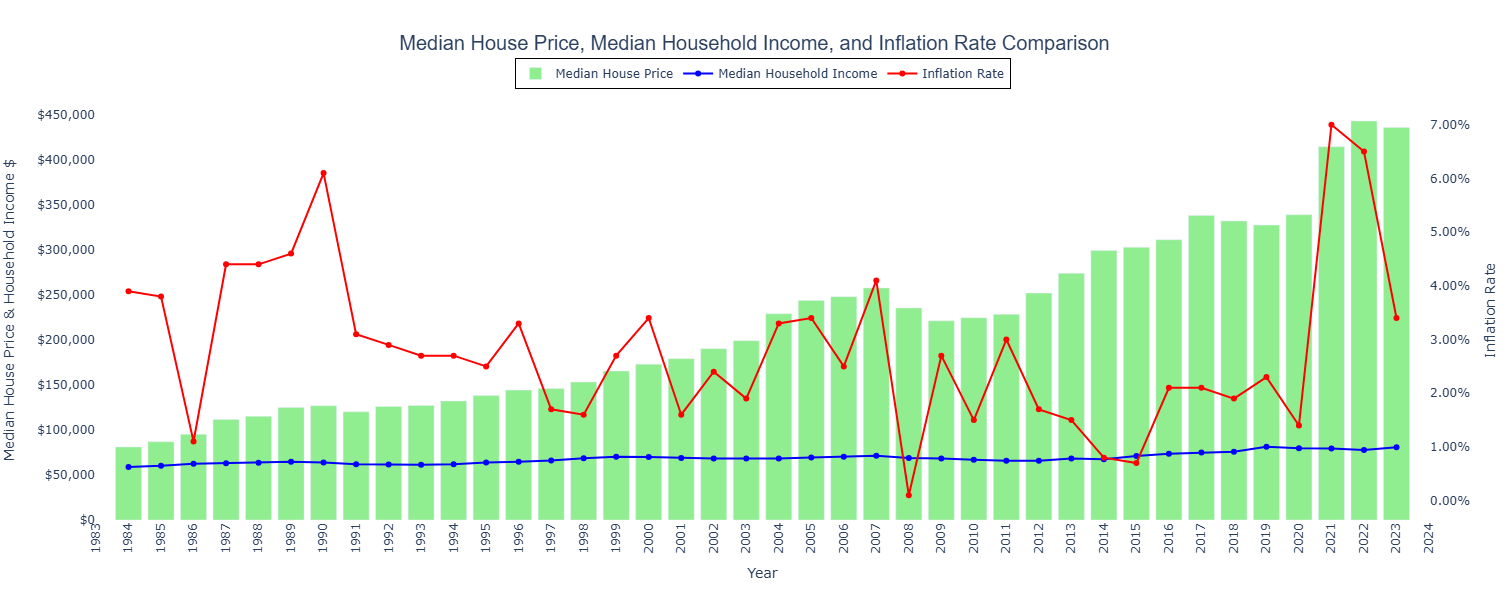

In [208]:
# Create the bar chart for Median House Price
bar_chart = go.Bar(x = combined_data_df["Year"],     # x-axis
                   y = combined_data_df["Median House Price"],     # y-axis
                   name = "Median House Price",     # bar_chart legend title
                   marker = dict(color = "lightgreen")     # Changes the color of the bars
                   )

# Create the line chart for Median Household Income
income_line_chart = go.Scatter(x = combined_data_df["Year"],     # x-axis
                               y = combined_data_df["Median Household Income"],     # y-axis
                               name = "Median Household Income",     # line_chart legend title
                               mode = "lines+markers",     # Creates a line chart with markers at each data point
                               marker = dict(color = "blue"),     # Changes the color of the line
                               )

# Create the line chart for Inflation Rate
inflation_line_chart = go.Scatter(x = combined_data_df["Year"],     # x-axis
                                  y = combined_data_df["Inflation Rate"],     # y-axis
                                  name = "Inflation Rate",     # inflation line chart legend title
                                  mode = "lines+markers",     # Creates a line chart with markers at each data point
                                  marker = dict(color = "red"),     # Changes the color of the line
                                  yaxis = "y2"  # Use a secondary y-axis for inflation
                                  )

# Create the layout with a secondary y-axis for Inflation Rate
layout = go.Layout(title = "Median House Price, Median Household Income, and Inflation Rate Comparison",
                   xaxis = dict(title = "Year", 
                                tickangle = -90,     # Rotate tick labels to vertical
                                dtick = 1,     # Set the increment for x-axis ticks (1 year)
                                range = [1983, 2024]),     # Set the beginning and end values for the x-axis range
                   plot_bgcolor = "white",     # Set plot area background color
                   title_x = 0.5,    # Center the title
                   title_font = dict(size = 20, family = "Arial, bold"),     # Set the title font size and style
                   width = 1200,
                   height = 600,
                   yaxis = dict(title = "Median House Price & Household Income $", side = "left", tickformat = "$,.0f"),     # Format for y-axis
                   yaxis2 = dict(title = "Inflation Rate", overlaying = "y", side = "right", tickformat = ".2%"),  # Secondary y-axis for Inflation Rate
                   legend = dict(x = 0.5, y = 1.1,     # Position the legend
                                 xanchor = "center",     # Center the legend horizontally
                                 yanchor = "top",     # Anchor the legend to the bottom
                                 orientation = "h",     # Horizontal orientation
                                 bordercolor = "Black",     # Border color of the legend
                                 borderwidth = 1  # Border width of the legend
                                 )
                  )

# Create the figure with all three charts
combo_fig = go.Figure(data = [bar_chart, income_line_chart, inflation_line_chart], layout = layout)

# Show the figure
combo_fig.show()

Graph Analysis:

### **Create a graph to compare the yearly Median House Price % Increase, vs the yearly Median Household Income % Increase, and the yearly Inflation Rate**

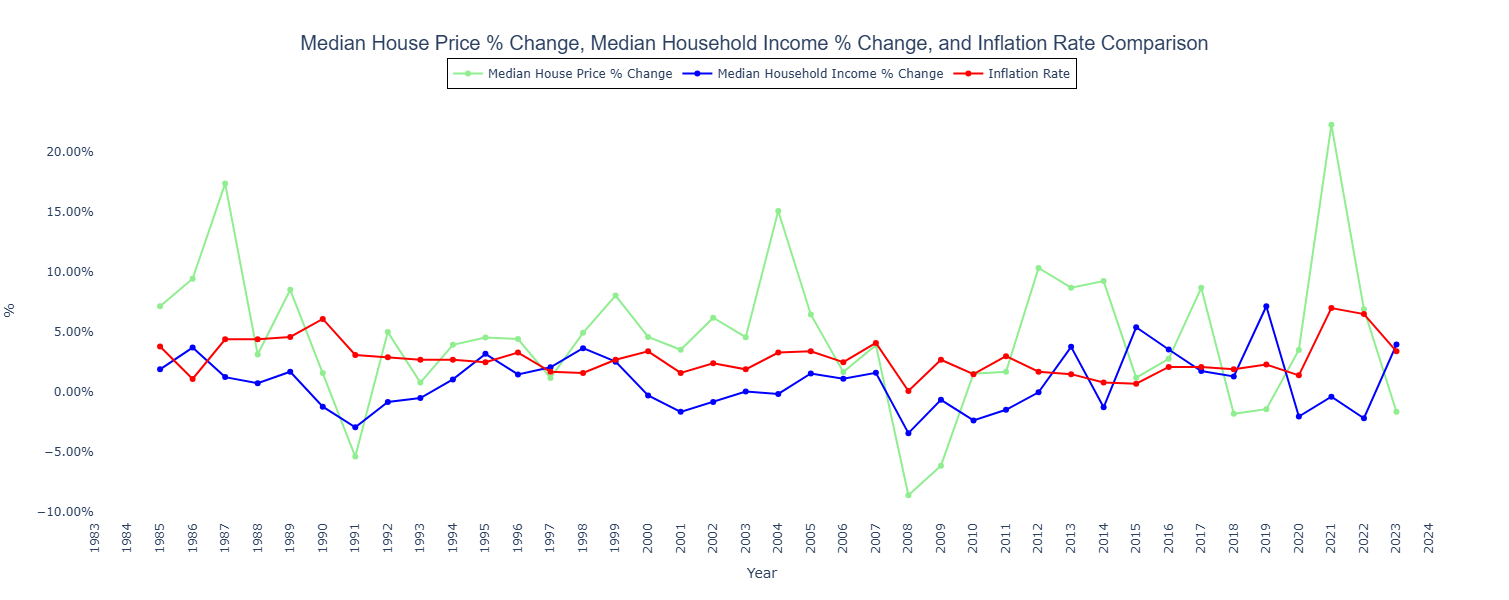

In [209]:
# Create the line chart for the Median House Price % Increase
price_line_chart = go.Scatter(x = combined_data_calculations_df["Year"],     # x-axis
                              y = combined_data_calculations_df["Median House Price % Change"],     # y-axis
                              name = "Median House Price % Change",     # line_chart legend title
                              mode = "lines+markers",     # Creates a line chart with markers at each data point
                              marker = dict(color = "lightgreen"),     # Changes the color of the line
                              )

# Create the line chart for Median Household Income % Increase
income_line_chart = go.Scatter(x = combined_data_calculations_df["Year"],     # x-axis
                               y = combined_data_calculations_df["Median Household Income % Change"],     # y-axis
                               name = "Median Household Income % Change",     # line_chart legend title
                               mode = "lines+markers",     # Creates a line chart with markers at each data point
                               marker = dict(color = "blue"),     # Changes the color of the line
                               )

# Create the line chart for Inflation Rate
inflation_line_chart = go.Scatter(x = combined_data_calculations_df["Year"],     # x-axis
                                  y = combined_data_calculations_df["Inflation Rate"],     # y-axis
                                  name = "Inflation Rate",     # inflation line chart legend title
                                  mode = "lines+markers",     # Creates a line chart with markers at each data point
                                  marker = dict(color = "red"),     # Changes the color of the line
                                  )

# Create the layout with a secondary y-axis for Inflation Rate
layout = go.Layout(title = "Median House Price % Change, Median Household Income % Change, and Inflation Rate Comparison",
                   xaxis = dict(title = "Year", 
                                tickangle = -90,     # Rotate tick labels to vertical
                                dtick = 1,     # Set the increment for x-axis ticks (1 year)
                                range = [1983, 2024]),     # Set the beginning and end values for the x-axis range
                   plot_bgcolor = "white",     # Set plot area background color
                   title_x = 0.5,    # Center the title
                   title_font = dict(size = 20, family = "Arial, bold"),     # Set the title font size and style
                   width = 1200,
                   height = 600,
                   yaxis = dict(title = "%", side = "left", tickformat = ".2%"),     # Format for y-axis
                   legend = dict(x = 0.5, y = 1.1,     # Position the legend
                                 xanchor = "center",     # Center the legend horizontally
                                 yanchor = "top",     # Anchor the legend to the bottom
                                 orientation = "h",     # Horizontal orientation
                                 bordercolor = "Black",     # Border color of the legend
                                 borderwidth = 1  # Border width of the legend
                                 )
                  )

# Create the figure with all three charts
combo_fig = go.Figure(data = [price_line_chart, income_line_chart, inflation_line_chart], layout = layout)

# Show the figure
combo_fig.show()

**Graph Analysis:**
- Median House Price and Household Income % Change shows the change in house price and household income year to year
- Median House Price flutuates quite a bit year to year

### **Statistical Analysis**

In [236]:
# Determine minimum and maximum dates in dataset
date_aggregation = combined_data_df["Year"].agg(["min", "max"])
date_aggregation

min    1984
max    2023
Name: Year, dtype: int32

In [292]:
# Determine minimum and maximum values for Median House Price for graph axis ranges
house_price_aggregation = combined_data_df["Median House Price"].agg(["min", "max"])

# Calculate change from min and max house price
house_price_change = house_price_aggregation["max"] - house_price_aggregation["min"]

# Determine the mean house price
house_price_average = np.mean(combined_data_df["Median House Price"])

# Determine the house price variance
house_price_variance = np.var(combined_data_df["Median House Price"])

# Format to dollar amounts
house_price_aggregation = house_price_aggregation.map(lambda x: "${:,.2f}".format(x))
house_price_change = "${:,.2f}".format(house_price_change)
house_price_average = "${:,.2f}".format(house_price_average)

# Find the year for the minimum and maximum house price
price_min_year = combined_data_df.loc[combined_data_df["Median House Price"].idxmin(), "Year"]
price_max_year = combined_data_df.loc[combined_data_df["Median House Price"].idxmax(), "Year"]

# Calculate change in years
price_year_change = price_max_year - price_min_year

# Display the results
print(f'The minimum house price is {house_price_aggregation["min"]} in the year {price_min_year}.')
print(f'The maximum house price is {house_price_aggregation["max"]} in the year {price_max_year}.')
print(f'House price has increased {house_price_change} in {price_year_change} years.')
print(f'The average house price is {house_price_average}.')
print(f'The house price variance is {house_price_variance}.')

The minimum house price is $81,000.00 in the year 1984.
The maximum house price is $442,600.00 in the year 2022.
House price has increased $361,600.00 in 38 years.
The average house price is $217,100.00.
The house price variance is 9316332000.0.


In [293]:
# Determine minimum and maximum values for Median Household Income for graph axis ranges
household_income_aggregation = combined_data_df["Median Household Income"].agg(["min", "max"])

# Calculate change from min and max house price
house_income_change = household_income_aggregation["max"] - household_income_aggregation["min"]

# Determine the mean household income
house_income_average = np.mean(combined_data_df["Median Household Income"])

# Determine the household income variance
house_income_variance = np.var(combined_data_df["Median Household Income"])

# Format the min and max values as dollar amounts
household_income_aggregation = household_income_aggregation.map(lambda x: "${:,.2f}".format(x))
house_income_change = "${:,.2f}".format(house_income_change)
house_income_average = "${:,.2f}".format(house_income_average)

# Find the year for the minimum and maximum inflation rate
income_min_year = combined_data_df.loc[combined_data_df["Median Household Income"].idxmin(), "Year"]
income_max_year = combined_data_df.loc[combined_data_df["Median Household Income"].idxmax(), "Year"]

# Calculate change in years
income_year_change = income_max_year - income_min_year

# Display the results
print(f'The minimum household income is {household_income_aggregation["min"]} in the year {income_min_year}.')
print(f'The maximum household income is {household_income_aggregation["max"]} in the year {income_max_year}.')
print(f'Household income has only increased {house_income_change} in {income_year_change} years.')
print(f'The average household income is {house_income_average}')
print(f'The household income variance is {house_income_variance}.')

The minimum household income is $58,930.00 in the year 1984.
The maximum household income is $81,210.00 in the year 2019.
Household income has only increased $22,280.00 in 35 years.
The average household income is $68,362.00
The household income variance is 32862256.0.


In [295]:
# Determine minimum and maximum values for Inflation Rate
inflation_rate_aggregation = combined_data_df["Inflation Rate"].agg(["min", "max"])
#inflation_rate_aggregation

# Determine the mean inflation rate
inflation_rate_average = np.mean(combined_data_df["Inflation Rate"])

# Determine the inflation rate variance
inflation_rate_variance = np.var(combined_data_df["Inflation Rate"])

# Format the min and max values as percentages with two decimal places
inflation_rate_aggregation = inflation_rate_aggregation.map(lambda x: "{:.2f}%".format(x * 100))
inflation_rate_average = "{:.2f}%".format(inflation_rate_average * 100)

# Find the year for the minimum and maximum inflation rate
rate_min_year = combined_data_df.loc[combined_data_df["Inflation Rate"].idxmin(), "Year"]
rate_max_year = combined_data_df.loc[combined_data_df["Inflation Rate"].idxmax(), "Year"]

# Display the results
print(f'The minimum inflation rate is {inflation_rate_aggregation["min"]} in the year {rate_min_year}.')
print(f'The maximum inflation rate is {inflation_rate_aggregation["max"]} in the year {rate_max_year}.')
print(f'The average inflation rate is {inflation_rate_average}')
print(f'The inflation rate variance is {inflation_rate_variance}.')

The minimum inflation rate is 0.10% in the year 2008.
The maximum inflation rate is 7.00% in the year 2021.
The average inflation rate is 2.82%
The inflation rate variance is 0.00022161000000000004.


In [298]:
# Determine minimum and maximum values for Median House Price % Change
price_change_aggregation = combined_data_calculations_df["Median House Price % Change"].agg(["min", "max"])

# Determine the mean house price change 
price_change_average = np.mean(combined_data_calculations_df["Median House Price % Change"])

# Determine the house price change variance
price_change_variance = np.var(combined_data_calculations_df["Median House Price % Change"])

# Format the min and max values as percentages with two decimal places
price_change_aggregation = price_change_aggregation.map(lambda x: "{:.2f}%".format(x * 100))
price_change_average = "{:.2f}%".format(price_change_average * 100)

# Find the year for the minimum and maximum median household income
price_change_min_year = combined_data_calculations_df.loc[combined_data_calculations_df["Median House Price % Change"].idxmin(), "Year"]
price_change_max_year = combined_data_calculations_df.loc[combined_data_calculations_df["Median House Price % Change"].idxmax(), "Year"]

# Display the results
print(f'The minimum house price % change is {price_change_aggregation["min"]} in the year {price_change_min_year}.')
print(f'The maximum house price % change is {price_change_aggregation["max"]} in the year {price_change_max_year}.')
print(f'The average house price % change is {price_change_average}')
print(f'The house price % change variance is {price_change_variance}.')

The minimum house price % change is -8.59% in the year 2008.
The maximum house price % change is 22.27% in the year 2021.
The average house price % change is 4.57%
The house price % change variance is 0.0034051855125299944.


In [296]:
# Determine minimum and maximum values for Median House Price % Change
income_change_aggregation = combined_data_calculations_df["Median Household Income % Change"].agg(["min", "max"])

# Determine the mean household income change 
income_change_average = np.mean(combined_data_calculations_df["Median Household Income % Change"])

# Determine the household income change variance
income_change_variance = np.var(combined_data_calculations_df["Median Household Income % Change"])

# Format the min and max values as percentages with two decimal places
income_change_aggregation = income_change_aggregation.map(lambda x: "{:.2f}%".format(x * 100))
income_change_average = "{:.2f}%".format(income_change_average * 100)

# Find the year for the minimum and maximum median household income
income_change_min_year = combined_data_calculations_df.loc[combined_data_calculations_df["Median Household Income % Change"].idxmin(), "Year"]
income_change_max_year = combined_data_calculations_df.loc[combined_data_calculations_df["Median Household Income % Change"].idxmax(), "Year"]

# Display the results
print(f'The minimum household income % change is {income_change_aggregation["min"]} in the year {income_change_min_year}.')
print(f'The maximum household income % change is {income_change_aggregation["max"]} in the year {income_change_max_year}.')
print(f'The average household income % change is {income_change_average}')
print(f'The household income % change variance is {income_change_variance}.')

The minimum household income % change is -3.41% in the year 2008.
The maximum household income % change is 7.15% in the year 2019.
The average household income % change is 0.83%
The household income % change variance is 0.0005425767706719782.


In [299]:
##### Create dataframe to show all aggregations #####

# Create lists with data
titles = ["Median House Price", "Median Household Income", "Inflation Rate", "Median House Price % Change", "Median Household Income % Change"]
mins = [house_price_aggregation["min"], household_income_aggregation["min"], inflation_rate_aggregation["min"], price_change_aggregation["min"], income_change_aggregation["min"]]
maxs = [house_price_aggregation["max"], household_income_aggregation["max"], inflation_rate_aggregation["max"], price_change_aggregation["max"], income_change_aggregation["max"]]
means = [house_price_average, house_income_average, inflation_rate_average, price_change_average, income_change_average]
variances = [house_price_variance, house_income_variance, inflation_rate_variance, price_change_variance, income_change_variance]

# Put 
data = {"Type": titles,
        "Minimum": mins,
        "Maximum": maxs,
        "Average": means,
        "Variance": variances}

statistic_aggregation_df = pd.DataFrame(data)

statistic_aggregation_df

,Type,Minimum,Maximum,Average,Variance
0,Median House Price,"$81,000.00","$442,600.00","$217,100.00",9.316332e+09
1,Median Household Income,"$58,930.00","$81,210.00","$68,362.00",3.286226e+07
2,Inflation Rate,0.10%,7.00%,2.82%,2.216100e-04
3,Median House Price % Change,-8.59%,22.27%,4.57%,3.405186e-03
4,Median Household Income % Change,-3.41%,7.15%,0.83%,5.425768e-04


In [312]:
##### Analyze Outliers #####

# Median House Price quartiles
house_price_quartiles = combined_data_df["Median House Price"].quantile([0.25, 0.5, 0.75])
house_price_lower_quartile = house_price_quartiles[0.25]
house_price_upper_quartile = house_price_quartiles[0.75]
house_price_iqr = house_price_upper_quartile - house_price_lower_quartile

# Median Household Income quartiles
household_income_quartiles = combined_data_df["Median Household Income"].quantile([0.25, 0.5, 0.75])
household_income_lower_quartile = household_income_quartiles[0.25]
household_income_upper_quartile = household_income_quartiles[0.75]
household_income_iqr = household_income_upper_quartile - household_income_lower_quartile

titles = ["Median House Price", "Median Household Income"]
lower_quartiles = [house_price_lower_quartile, household_income_lower_quartile]
upper_quartiles = [house_price_upper_quartile, household_income_upper_quartile]
iqr = [house_price_iqr, household_income_iqr]

data = {"Type": titles,
        "Lower Quartile": lower_quartiles,
        "Upper Quartile": upper_quartiles,
        "IQR": iqr}

quartile_df = pd.DataFrame(data)

quartile_df["Lower Quartile"] = quartile_df["Lower Quartile"].map("${:,.2f}".format)
quartile_df["Upper Quartile"] = quartile_df["Upper Quartile"].map("${:,.2f}".format)
quartile_df["IQR"] = quartile_df["IQR"].map("${:,.2f}".format)

quartile_df

,Type,Lower Quartile,Upper Quartile,IQR
0,Median House Price,"$130,750.00","$279,925.00","$149,175.00"
1,Median Household Income,"$63,815.00","$70,407.50","$6,592.50"


In [313]:
# Calculate the lower and upper bounds for outliers
house_price_lower_bound = house_price_lower_quartile - (1.5 * house_price_iqr)
house_price_upper_bound = house_price_upper_quartile + (1.5 * house_price_iqr)

household_income_lower_bound = household_income_lower_quartile - (1.5 * household_income_iqr)
household_income_upper_bound = household_income_upper_quartile + (1.5 * household_income_iqr)

# Count outliers for Median House Price
house_price_outliers = combined_data_df[(combined_data_df["Median House Price"] < house_price_lower_bound) | 
                                         (combined_data_df["Median House Price"] > house_price_upper_bound)]
house_price_outlier_count = house_price_outliers.shape[0]

# Count outliers for Median Household Income
household_income_outliers = combined_data_df[(combined_data_df["Median Household Income"] < household_income_lower_bound) | 
                                             (combined_data_df["Median Household Income"] > household_income_upper_bound)]
household_income_outlier_count = household_income_outliers.shape[0]

# Print the counts of outliers
print(f"Number of outliers in Median House Price: {house_price_outlier_count}")
print(f"Number of outliers in Median Household Income: {household_income_outlier_count}")

Number of outliers in Median House Price: 0
Number of outliers in Median Household Income: 2
